In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import glob
# read in each iteration's features, targets, and std

filesList = glob.glob('modelParetoFronts/features/*')


for iteration in range(len(filesList)):  
    features = np.loadtxt(f"modelParetoFronts/features/featuresIter{iteration}.txt")
    targets = np.loadtxt(f"modelParetoFronts/targets/targetsIter{iteration}.txt")
    std = np.loadtxt(f"modelParetoFronts/uncertainties/stdIter{iteration}.txt")
    objtv1 = np.loadtxt(f'objtv0/train_obj_hvkg_{iteration}.txt')
    objtv2 = np.loadtxt(f'objtv1/train_obj_hvkg_{iteration}.txt')

    fig = plt.figure(figsize=(10, 8))

    # Create a 2x2 grid, but make top span both columns
    gs = fig.add_gridspec(2, 2)

    # Top row: one wide subplot
    ax_top = fig.add_subplot(gs[0, :])

    # Bottom row: two subplots side by side
    ax_bottom_left = fig.add_subplot(gs[1, 0])
    ax_bottom_right = fig.add_subplot(gs[1, 1])

    # Example plots

    ax_top.errorbar(targets[:, 0], targets[:, 1], xerr=std[:,0], yerr=std[:, 1], fmt='o', label='Objective 1', capsize=5, errorevery=3)
    ax_top.set_title(f'Iteration {iteration} - NSGAII Pareto Front')
    ax_top.set_xlabel('Objective 1')
    ax_top.set_ylabel('Objective 2')
    ax_top.set_xlim(-0.2, 1.75)
    ax_top.set_ylim(-0.2, 1.75)
    # ax_top.plot([0, 1, 2], [0, 1, 0], label="NSGAII Pareto Front")
    # ax_top.legend()

    objtv1 = np.loadtxt('objtv0/train_obj_hvkg_0.txt')
    objtv2 = np.loadtxt('objtv1/train_obj_hvkg_1.txt')

    ax_bottom_left.plot(objtv1, marker='o', linestyle='--', color='blue')
    ax_bottom_left.set_xlabel("Iteration")
    ax_bottom_left.set_ylabel("Objective Value")
    ax_bottom_left.set_title("Objtv 1")

    ax_bottom_right.plot(objtv2, marker='o', linestyle='--', color='red')
    ax_bottom_right.set_xlabel("Iteration")
    ax_bottom_right.set_ylabel("Objective Value")



    # plt.grid(True)
    plt.savefig(f"modelParetoFronts/paretoPlots/iteration_{iteration}.png")
    plt.close()
    # plt.show()

# load in all saved figures and generate an animated GIF
import imageio
images = []
for iteration in range(len(filesList)):
    images.append(imageio.imread(f"modelParetoFronts/paretoPlots/iteration_{iteration}.png"))
imageio.mimsave('pareto_animation.gif', images, duration=1)   
# print completion message
print("Plots generated and saved as GIF.")


FileNotFoundError: objtv0/train_obj_hvkg_13.txt not found.

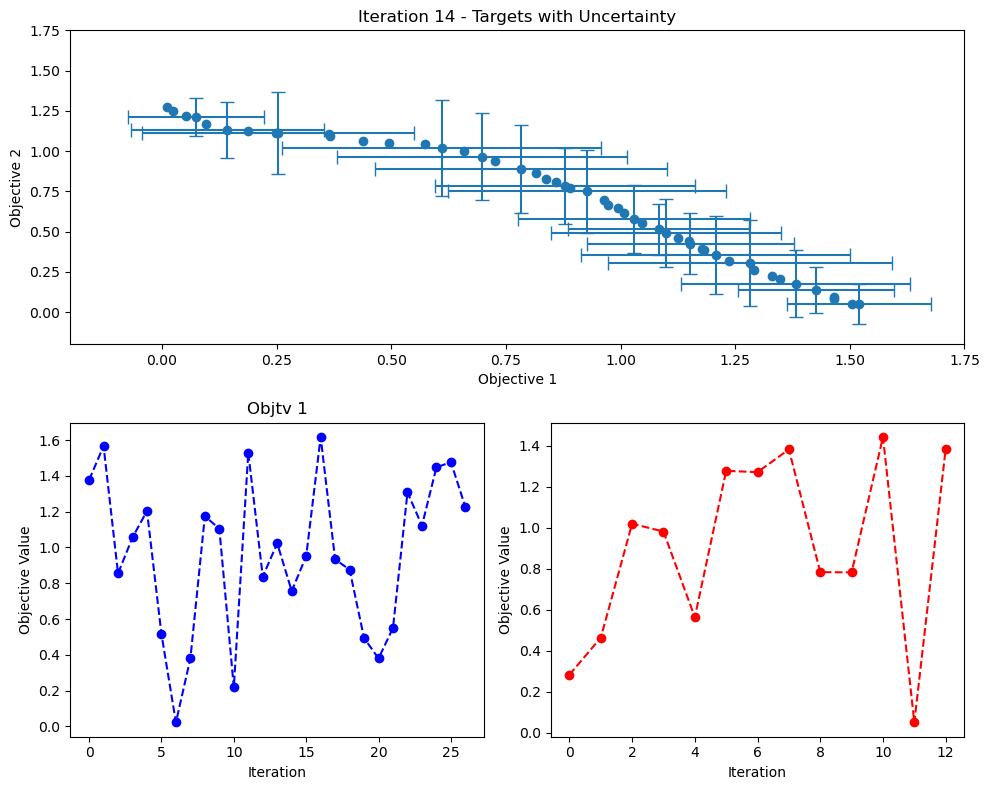

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Create a 2x2 grid, but make top span both columns
gs = fig.add_gridspec(2, 2)

# Top row: one wide subplot
ax_top = fig.add_subplot(gs[0, :])

# Bottom row: two subplots side by side
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Example plots

ax_top.errorbar(targets[:, 0], targets[:, 1], xerr=std[:,0], yerr=std[:, 1], fmt='o', label='Objective 1', capsize=5, errorevery=3)
ax_top.set_title(f'Iteration {iteration} - NSGAII Pareto Front')
ax_top.set_xlabel('Objective 1')
ax_top.set_ylabel('Objective 2')
ax_top.set_xlim(-0.2, 1.75)
ax_top.set_ylim(-0.2, 1.75)
# ax_top.plot([0, 1, 2], [0, 1, 0], label="NSGAII Pareto Front")
# ax_top.legend()

objtv1 = np.loadtxt('objtv0/train_obj_hvkg_0.txt')
objtv2 = np.loadtxt('objtv1/train_obj_hvkg_1.txt')

ax_bottom_left.plot(objtv1[:iteration+13], marker='o', linestyle='--', color='blue')
ax_bottom_left.set_xlabel("Iteration")
ax_bottom_left.set_ylabel("Objective Value")
ax_bottom_left.set_title("Objtv 1")

ax_bottom_right.plot(objtv2[:iteration+13], marker='o', linestyle='--', color='red')
ax_bottom_right.set_xlabel("Iteration")
ax_bottom_right.set_ylabel("Objective Value")



plt.tight_layout()
plt.show()

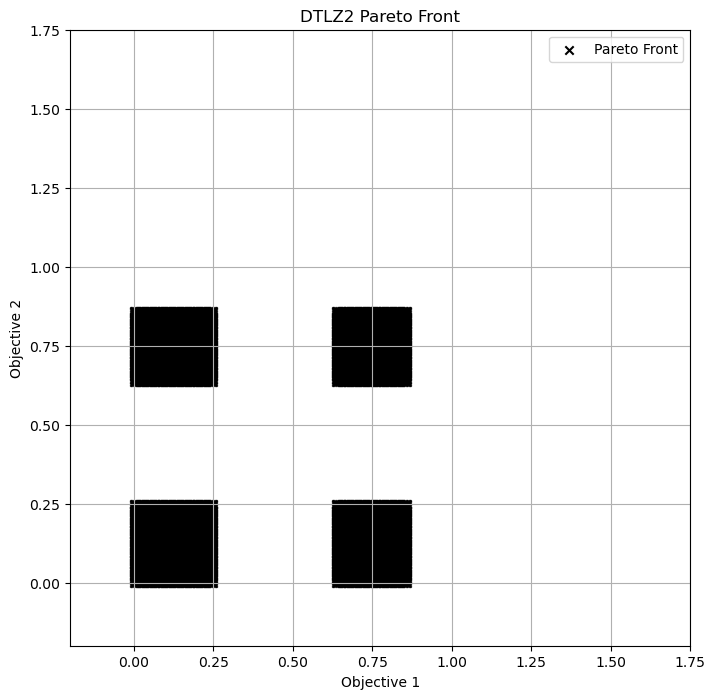

In [4]:
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=20)
pf = get_problem("dtlz7").pareto_front()

#save the pareto front as a numpy array and plot it
pfArray = np.array(pf)
plt.figure(figsize=(8, 8))
plt.scatter(pfArray[:, 0], pfArray[:, 1], c='black', marker='x', label='Pareto Front')
plt.title('DTLZ2 Pareto Front')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.xlim(-0.2, 1.75)
plt.ylim(-0.2, 1.75)
plt.grid(True)
plt.legend()
# plt.savefig('dtlz2_pareto_front.png')
plt.show()
